## Number Theory
Examples from the book: [Stein, Elementary Number Theory](https://wstein.org/books/ent/). The examples use [Sage](http://www.sagemath.org/), a math library, and the Python programming language. 

**Add info about the key exchange problem and how it can be solved using one-way functions that are based on difficult problems such as** 
1. the factorization of a large number, such as in RSA
2. the computation of discrete logarithms

Both of them are based of Number Theory whose concepts and results will be summarized here.

## Prime Numbers
The set of natural numbers is N = {1,2,3,4,...}  
The set of integers is Z = {...,-2,-1,0,1,2,...}  

In [609]:
range(-5,5)

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4]

An integer n > 1 is a prime if the only positive divisors of n are 1 and n. If a number n is not divisible by any prime up to $\sqrt{n}$, it must be a prime for any composite number has at least two prime factors and they cannot be both greater than $\sqrt{n}$

In [79]:
prime_range(10,50)

[11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]

Composites are integers that are not primes

In [2]:
[n for n in range(10,30) if not is_prime(n)]

[10, 12, 14, 15, 16, 18, 20, 21, 22, 24, 25, 26, 27, 28]

#### Definition: Greatest Common Divisor
Given two integers a and b, it is the greatest integers that divides both a and b. Here follow some examples showing some facts about gcd 

In [5]:
gcd(9,12)

3

In [6]:
gcd(0,4)

4

In [12]:
gcd(9,12 - 9)

3

In [13]:
gcd(9,12 + 9)

3

In [14]:
gcd(9,12 - 5*9)

3

In [11]:
gcd(9,12 + 5*9)

3

In [64]:
gcd(9*10,12*10)

30

#### Relatively prime
Two integers a,b, are said to be relatively prime, i.e. the only common divisor is 1, if gcd(a,b) = 1. Being a,b relatively prime does not imply a nor b is prime.

In [171]:
gcd(14,9)

1

#### Division Algorithm
Given two integers a and b, with b != 0, there exists unique integers q, the quotient, and r, the remainder, such that 0 <= r < |b| and a = bq + r 

In [60]:
a = 2261
b = 1275
q = a//b # quotient
r = a%b  # remainder r = a - b*q 
q,r

(1, 986)

In [38]:
a == b*q + r

True

#### Algorithm: Greatest Common Division (Euclidean Algorithm)
A recursive function to compute the greatest common divisor.

In [231]:
def recgcd(a,b):
    if b > a :
        c = a
        a = b
        b = c
    r = a%b
    if r == 0 :
        return b
    else :
        return recgcd(b,r)

In [232]:
recgcd(1275,2261)

17

If d = gcd(a,b) then 

$\exists$ x,y $\in$ Z | ax + by = d  

This follows from the fact that since d|a and d|b there must be two integers x,y for which d = ax + by. This same result shows that a linear equation of the form ax + by = d, also known as Diophantine equation, where x and y are integers, has a solution only if d is a multiple of the greatest common divisor of a and b. Sage provides a function to compute the gcd and x and y

In [235]:
xgcd(14,9)

(1, 2, -3)

#### Fundamental Theorem of Arithmetic (Euclid)
Every natural number n can be written as a product of primes  
n = p1^e1*p2^e2..pr^er  
where p1,p2,..pr are distinct primes and e1,e2,..er are positive integers, and that product is unique.

In [76]:
factor(15)

3 * 5

#### Algorithm: Prime Sieve
Given a positive integer n, this algorithm computes a list of primes from 2 up to n.

In [160]:
def primeSieve(n): 
    # recursive subfunction
    def crossOff(n,odds,primes): 
        p = odds[0] 
        if p > sqrt(n):
            [primes.append(odd) for odd in odds]
        else:
            primes.append(p)
            odds = [odd for odd in odds if not odd%p == 0]
            crossOff(n,odds,primes)
        return primes
    
    primes = [2]
    odds = [j for j in range(3,n) if not j%2 == 0]
    
    return crossOff(n,odds,primes)

In [161]:
primeSieve(40)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37]

The same can be computed using Sage

#### Number of primes in an interval
Sage provides a quick function to compute pi(x), the number of primes from 2 up to a number x. It can also be shown that the ratio between the function pi(x) and x/log(x) is asymptotically equal to 1.

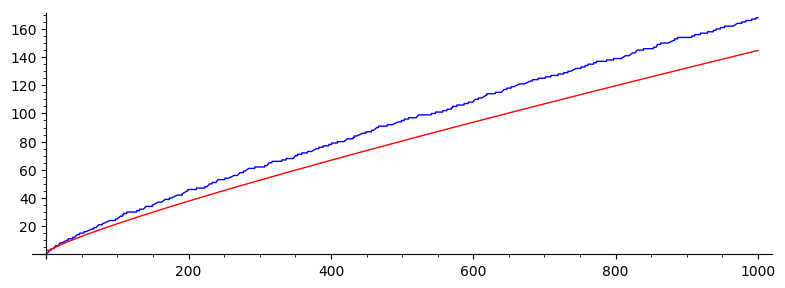

In [95]:
plot_prime = plot(prime_pi(x),2,1000,rgbcolor='blue')
plot_asympt = plot(x/(log(x)),2,1000,rgbcolor='red')
show(plot_prime + plot_asympt,xmin=0,figsize=[8,3])

The ratio pi(x)/(log(x) - 1) is asymptotically equal to 1.

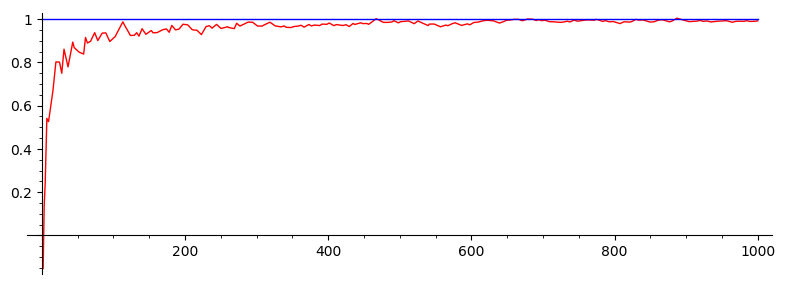

In [97]:
plot_ratio = plot(prime_pi(x)*(log(x)-1)/x,2,1000,rgbcolor='red')
plot_const = plot(1,2,1000,rgbcolor='blue')
show(plot_ratio + plot_const,xmin=0,figsize=[8,3])

## The Ring of Integers Modulo n

We build the set of integers $Z_N$ where N is the modulus. This set of equivalent classes, or residue classes modulus N, divides the integers Z in N subsets, or rings for which the arithmetic operation of addition and multiplication apply in a similar way like for the integers in Z.

In [312]:
Z11 = Integers(11) 
list(Z11)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

#### Congruences
If a,b are integers and n is a natural number we say that a is congruent to b modulo n if n|a-b and write  a$\equiv$b(mod n)  
If a $\equiv$ b (mod n) then there exists an integer ysuch that ny= a - b or a = ny+ b.

In [314]:
[Z11(11*y + 2) for y in range(1,5)]

[2, 2, 2, 2]

The set ($Z_N$)* are all the elements x of $Z_N$ for which gcd(x,N) = 1. One important property of ($Z_N$)* is that all its elements x have an inverse $x^-1$

In [361]:
Z11_star = [x for x in Z11 if gcd(x,11) == 1]; Z11_star 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

#### Linear Congruences
For example the inverse of 3 in $(Z_{11})^*$ can be computed from the linear congruence $3x \equiv$ 1 (mod 11). This equivalence can be written as a linear equation 3x = 11y + 1 and solved for y = 1 so that x = 4. We can show that $3^{-1} \equiv$ 4 (mod 11) 

In [602]:
Mod(3,11) * Mod(4,11)

1

In the same way we can find, e.g. $5^{-1}\equiv$ -2 (mod 11)

In [603]:
Mod(5,11) * Mod(9,11)

1

The inverse x of an element a of $(Z_{n})^*$ such as in $ax\equiv$ b (mod n), can be found using the Extended GCD Sage function xgcd(a,n) that solves the linear equation ax = ny + b , and returns gcd(a,n), equal to 1 if b = 1, x and y  

In [522]:
xgcd(3,11) # returns gcd(3,11), the inverse of 3 in Z11

(1, 4, -1)

Sage has an even more straightforward fuction to compute inverses modulo n

In [523]:
Mod(3,11)^-1

4

#### Order of an Element of $Z_N$
There exists an exponent of x, h, for which $x^h \equiv$ 1 (mod n). The smallest exponent h, for which the relation holds, is called the **order of x to the modulus n**. Let's see two examples for x = 2 and x = 3 (mod 11)

In [808]:
p = 11
min([order for order in range(1,p) if Mod(2,p)^order == 1])

10

In [807]:
min([order for order in range(1,p) if Mod(3,p)^order == 1]) # In this case the least exponent is 5

5

We can compute the order of all the elements in $(Z_{11})^*$ 

In [806]:
p = 11
[[x,min([order for order in range(1,p) if Mod(x,p)^order == 1])] for x in range(1,p)]

[[1, 1],
 [2, 10],
 [3, 5],
 [4, 5],
 [5, 5],
 [6, 10],
 [7, 10],
 [8, 10],
 [9, 5],
 [10, 2]]

We can also use directly a function provided by Sage

In [625]:
[[x,x.multiplicative_order()] for x in Z11_star]

[[1, 1],
 [2, 10],
 [3, 5],
 [4, 5],
 [5, 5],
 [6, 10],
 [7, 10],
 [8, 10],
 [9, 5],
 [10, 2]]

We can compute $9^5\equiv$ 1 (mod 11) for example 

In [620]:
Mod(9,11)^5

1

#### Fermat's Little Theorem
Formally the theorem can be stated as follow

$\forall x \in (Z_p)^*, x^{p-1} \equiv 1$ (mod p)

In words, the equivalence holds if p is a prime and does not divide x, i.e. gcd(x,p) = 1. 

In [796]:
p = 11
powers = [x^(p-1) for x in Z11_star]; powers

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Fermat's theorem can be used to test the primality of a number and to generate a random prime. First a random number p is generated, e.g. p $\in [2^{1024},2^{1025} - 1]$, and then it is tested with the Fermat's theorem whether it is prime or not. Since 2 is the smallest prime, x is usually set to 2 so that any p > 2 cannot divide 2 and the primality test is performed with

$2^{p-1} \equiv 1$ (mod p)  

If the equivalence does not hold, it means that p is certainly not a prime. If the equivalence does hold, it means that p is likely prime. The primality of a number can be tested in Sage. 

In [147]:
def prime(p):
    if p == 2 or Mod(2,p)^(p-1) == 1:
        return true
    else:
        return false

prime(323)

False

Sage provides a function to test directly the primality of a number

In [148]:
is_prime(323)

False

Fermat's theorem can also be used to compute the inverse since $x^{p-2}\equiv x^{-1}$ (mod p)

In [155]:
p = 11
x = Mod(3,p); x

3

In [156]:
a = Mod(3,p)^9; a

4

In [157]:
x * a

1

#### Euler's function $\phi(n)$
It is defined for any positive integer n as: $\phi(n) = |(Z_n)^*|$  In words, the Euler's function represents the number of elements in $Z_n$ that are relatively prime to n.

In [618]:
Z12 = Integers(12)
Z12_star = [x for x in Z12 if gcd(x,12) == 1]; Z12_star

[1, 5, 7, 11]

In [341]:
phi = len([x.multiplicative_order() for x in Z12_star]); phi

4

It is also available from Sage

In [624]:
euler_phi(12)

4

#### Euler's Theorem
Formally the theorem can be stated as: $\forall x \in (Z_N)^*, x^{\phi(N)} \equiv 1$ (mod N)  

In [795]:
[x^euler_phi(12) for x in Z12_star]

[1, 1, 1, 1]


Euler's theorem helps in computing the powers of congruences. For examples $7^9$ (mod 12).  
Since $\phi(12) = 4$ such that $7^4 \equiv 1$ (mod 12) then  $7^9 \equiv 7^{4+4+1} \equiv 7^47^47^1 \equiv 7^1$ (mod 12)

In [538]:
Mod(7,12)^9 == Mod(7,12)

True

#### Modular exponentiation
How to Compute $a^m$ (mod n)  

A naive approach to computing $a^m$ (mod n) is to simply compute $a^m$ = a*a*...a, and then reduce by modulo m. This algorithm is inefficient because it requires m-1 multiplications, expecially when m has hundreds of digits. A much more efficient algorithm is the following

1. Apply the Euler's theorem to reduce the exponent
2. Compute the binary format of the remaining exponent
3. Compute the squares of a modulo n according to the binary digits
4. Compute the product of the squares of a

The number of operations needed with this algorithm depends on the number of binary digits of m instead of on m-1.

For example, let's compute $7^{91} \equiv$ (mod 100)

In [586]:
gcd(7,100) # 7 does not divide 100

1

In [849]:
euler_phi(100)

6

Since $\phi{(100)}$ = 40, then for the Euler's theorem, we can just compute $7^{11} \equiv$ (mod 100)

It's easy to transform the exponent in binary digits

In [588]:
def binary(m,s=""):
    # A recursive function to change
    # from digits to binary string
    if m == 0:
        return s 
    else:
        if m%2 == 0:
            s = "0" + s
        else:
            s = "1" + s
        return binary(m//2,s)    

In [589]:
binary(11)

'1011'

So 11 = $1*2^3$ + $0*2^2$ + $1*2^1$ + $1*2^0$. This means that we have just to compute repeatedly $7^2\equiv$49 (mod 100) then $(7^2)^2\equiv$1 (mod 100) and $((7^2)^2)^2\equiv$1 (mod 100) so that $7^{11}\equiv1*49*7 \equiv$43 (mod 100) 

Sage implements the algorithm so that the example can be computed easily

In [597]:
Mod(7,100)^91

43

#### The structure of $(Z_p)^*$

If p is prime, then $\phi(p)$ = p - 1 and $(Z_p)^*$ is cyclic group whose order is $\phi(p)$ and for which there exist an element g $\in (Z_p)^*$ whose powers from 2 up to p-2, i.e. {$g^2, g^3,...,g^{p-2}$} will span the entire set $(Z_p)^*$

In [6]:
Z7 = Integers(7)
list(Z7)

[0, 1, 2, 3, 4, 5, 6]

$(Z_7)^*$

In [7]:
Z7_star = [x for x in Z7 if gcd(x,7) == 1]; Z7_star

[1, 2, 3, 4, 5, 6]

Let's see the set generated by raising 3 in $(Z_7)^*$ to the power of 2 up to 5. As we can see, the powers of 3 span the entire set $(Z_7)^*$. That is, 3 is a **generator** of $(Z_7)^*$.

In [142]:
p = 7
[Mod(3,p)^n for n in range(p-1) if gcd(3,p) == 1 ]  # range(a) = [0,1,..,a)

[1, 3, 2, 6, 4, 5]

3 (mod 7) in $(Z_7)^*$ is called generator or primitive root modulo 7. Sage provides a function to compute the primitive root of $(Z_p)^*$

In [143]:
primitive_root(7)

3

The order of the generator is equal to $\phi(p)$ 

In [144]:
p = 7
generator = 3
g = Mod(generator,p)
g.multiplicative_order() 

6

In [145]:
[x^euler_phi(7) for x in Z7_star]

[1, 1, 1, 1, 1, 1]

As an additional example, we can compute the order of all the elements in $(Z_{11})^*$

In [146]:
p = 11 # a prime number
Zp = Integers(p)
Zp_star = [x for x in Zp if gcd(x,p) == 1]
element_order_list = [[x,min([order for order in range(1,p) if Mod(x,p)^order == 1])] for x in Zp_star]; element_order_list

[[1, 1],
 [2, 10],
 [3, 5],
 [4, 5],
 [5, 5],
 [6, 10],
 [7, 10],
 [8, 10],
 [9, 5],
 [10, 2]]

In [134]:
orders = sorted(Set([element_order_list[x][1] for x in range(0,p-1)])); orders

[1, 2, 5, 10]

The group $(Z_p)^*$ can be divided by subgroups according to the order of its elements

In [135]:
elements_by_order = [[order,sorted([x[0] for x in element_order_list if x[1] == order])] for order in orders]; elements_by_order

[[1, [1]], [2, [10]], [5, [3, 4, 5, 9]], [10, [2, 6, 7, 8]]]

We compute the cardinality $\phi(11)$ = $|(Z_{11})^*|$

In [136]:
G = len(Zp_star); G

10

In [137]:
elements_highest_order = [x[1] for x in elements_by_order if x[0] == G][0]; elements_highest_order

[2, 6, 7, 8]

All the elements of $(Z_{11})^*$ whose order is equal to |$(Z_{11})^*$| are primitive and can generate all the other elements as shown below

In [138]:
[sorted([Mod(x,p)^n for n in range(1,p) if gcd(x,p) == 1 ]) for x in elements_highest_order] 

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]

The number of generators in $(Z_p)^*$ can be computed by $\phi(|(Z_p)^*|)$

In [139]:
euler_phi(G)

4

Elements whose order is different from |$(Z_{11})^*$| cannot generate all the elements

In [140]:
sorted(Set([Mod(3,p)^n for n in range(1,p) if gcd(6,p) == 1 ]))

[1, 3, 4, 5, 9]

As we can see the orders of each element of $(Z_{11})^*$ divide $|(Z_{11})^*|$. More in general, $\forall$ x $\in (Z_p)^*$, ord(x) | |$(Z_p)^*$|. It can also be shown that if |$(Z_p)^*$| is prime, then all elements in $(Z_p)^*$, but 1 (mod p), are prime.

#### Polynomials over $Z_p$

We will focus of quadratic polynomials of the form $ax^2+bx+c\equiv$ 0 (mod n)  
By definition, a **quadratic residue** is any element a of $Z_p$, not divisible by p, for which $a^2\equiv$ 1 (mod p)

In [765]:
p = 11
QR = [x for x in range(1,p) if gcd(x,p) == 1 and Mod(x,p)^2 == 1]; QR # QR = Quadratic Residue

[1, 10]

Quadratic residues in $Z_p$ have also square roots. Sage provides a function to compute the roots of a polynomial. For example in $Z_{13}$ since $\phi(13)$ = 6, then from the Euler's theorem $x^6\equiv$1 (mod 13) and the primitive roots can be computed solving the polynomial function $x^6 - 1$ in $Z_{13}$

In [2]:
euler_phi(10)

4

In [755]:
Z13.<x> = PolynomialRing(Integers(13))
f = x^6 - 1
f.roots()

[(12, 1), (10, 1), (9, 1), (4, 1), (3, 1), (1, 1)]

Let's find the quadratic residues modulo 5

In [773]:
Z5 = Integers(5)
list(Z5)

[0, 1, 2, 3, 4]

In [763]:
p = 5
QR = [x for x in range(1,p) if gcd(x,p) == 1 and Mod(x,p)^2 == 1]; QR

[1, 4]

The elements in $Z_p$ that are not quadratic residues are called called simply quadratic nonresidue. The two types of elements are differentiated using the **Legendre Symbols**

+ 1 for the quadratic residues
+ -1 for the quadratic nonresidues  

For example, 1 and 4 are quadratic residues in $(Z_5)^*$ while 2 and 3 are quadratic nonresidues.

In [771]:
p = 5
[[x,legendre_symbol(Mod(x,p),p)] for x in range(1,p) if gcd(x,p) == 1]

[[1, 1], [2, -1], [3, -1], [4, 1]]

#### Euler's Criterion
An element a $\in (Z_p)^*$ is a quadratic residue if and only if $a^{(p-1)/2}\equiv$ 1 (mod p)

In [141]:
p = 11
QR = [a for a in range(1,p) if gcd(a,p) == 1 and Mod(a,p)^((p-1)//2) == 1]; QR

[1, 3, 4, 5, 9]

#### Discrete Logarithms 
The problem is, given a large prime number p and two elements a,b $\in (Z_p)^*$, to find out the value of an integer 1 $\le x \le p-1$ such that $a^x\equiv$ b (mod p). In other words, the problem is to compute $x\equiv log_a b$ (mod p) 

In [158]:
p = 97 # p prime number 
g = primitive_root(p); g # generator, with 1 < g < p

5

In [159]:
a = Mod(g,p)
x = randint(1,p)
b = a^x
print(a,x,b)

(5, 8, 6)


A naive solution to the problem of finding the discrete logarithm is to simply try different values of the exponent till it matches $a^x$(mod p).

In [160]:
x_match = [x_test for x_test in range(p) if Mod(g,p)^x_test == b ][0]; x_match

8

In [161]:
x_match == x

True

The problem with the naive approach is that it becomes infeasible for modulus p with hundreds of digits.

#### Diffie-Hellman protocol
Here we implement the Diffie-Hellman protocol in which the eavesdropper would have to compute the discrete logarithm of a large number in order to find out the secret key shared by Alice and Bob to encrypt their messages.

In [176]:
p = random_prime(10^6,10^9) # Alice chooses a big prime number p and a generator and send them to Bob over a public insecure network 
g = primitive_root(p) # generator, with 1 < g < p
print(p,g)

(682723, 2)


In [177]:
n = randint(1,p) # Alice' secret key, a random number chosen uniformly from the set of integers {1,2,...,p-1}
m = randint(1,p) # Bob's secret key, a random number chosen uniformly from the set of integers {1,2,...,p-1}
g_exp_n = Mod(g,p)^n # Alice sends this number to Michael over a public network
g_exp_m = Mod(g,p)^m # Bob sends this number to Nikita over a public network
print(n,m,g_exp_n,g_exp_m)

(332902, 111948, 308027, 72029)


In [180]:
sm = g_exp_n^m # shared secret key computed by Bob
sn = g_exp_m^n # shared secret key computed by Alice
sm == sn # Alice and Bob share the same key  Mod(g,p)^(n*m), that supposedly no one else knows, to encrypt their messages

True

An eavesdropper, that wants to find out the secret key shared by Alice and Bob, has to extract n from $g^n$(mod p) or m from $g^m$(mod p) by computing, e.g. $log_g(g^n)$(mod p).

In [179]:
n_match = [n_test for n_test in range(p) if Mod(g,p)^n_test == g_exp_n ][0]; n_match

332902

In [181]:
broken_secret_key = g_exp_m^n_match
broken_secret_key == sn

True